# The Basic Approach and Visualizations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train_data.csv", na_values=[" ","?","#"])
test_data = pd.read_csv("test_data.csv", na_values=[" ", "?", "#"])
assembly_line_data = pd.read_csv("assembly_line_info.csv", na_values=[" ", "?", "#"])
car_variant_data = pd.read_csv("car_variant_data.csv", na_values=[" ", "?", "#"])
issue_info_data = pd.read_csv("issue_info.csv", na_values=[" ", "?", "#"])
log_report_type_data = pd.read_csv("log_report_type_data.csv", na_values=[" ", "?", "#"])

In [3]:
print("The shape of train data is: ",train_data.shape)
print("The shape of test data is: ",test_data.shape)
print("The shape of assembly line data is: ",assembly_line_data.shape)
print("The shape of car variant data is: ",car_variant_data.shape)
print("The shape of issue info data is: ",issue_info_data.shape)
print("The shape of the log report data is: ",log_report_type_data.shape)

The shape of train data is:  (5904, 3)
The shape of test data is:  (1477, 2)
The shape of assembly line data is:  (21076, 2)
The shape of car variant data is:  (31170, 2)
The shape of issue info data is:  (18552, 2)
The shape of the log report data is:  (58671, 3)


In [4]:
train_data.head() 

,id,factory_number,downtime_duration
0,13366,factory_number_415,1
1,6783,factory_number_474,0
2,9519,factory_number_931,1
3,10202,factory_number_700,1
4,4555,factory_number_600,2


In [5]:
train_data.downtime_duration.value_counts() 

0    3827
1    1496
2     581
Name: downtime_duration, dtype: int64

In [6]:
train_data.factory_number.nunique() 

876

In [7]:
test_data.head() 

,id,factory_number
0,3340,factory_number_344
1,14067,factory_number_933
2,1134,factory_number_16
3,27,factory_number_793
4,9793,factory_number_344


In [8]:
print(assembly_line_data.shape) 
print(assembly_line_data.id.nunique())
assembly_line_data.head() 

(21076, 2)
18552


,id,assembly_line_type
0,6597,assembly_line_type_8
1,8011,assembly_line_type_8
2,2597,assembly_line_type_8
3,5022,assembly_line_type_8
4,6852,assembly_line_type_8


In [9]:
assembly_line_data.assembly_line_type.value_counts() 

assembly_line_type_8     10268
assembly_line_type_2      8918
assembly_line_type_6       582
assembly_line_type_7       498
assembly_line_type_4       330
assembly_line_type_9       190
assembly_line_type_3       145
assembly_line_type_10       73
assembly_line_type_1        58
assembly_line_type_5        14
Name: assembly_line_type, dtype: int64

In [10]:
car_variant_data.head() 

,id,car_variant
0,6597,car_variant_11
1,8011,car_variant_15
2,2597,car_variant_15
3,5022,car_variant_15
4,5022,car_variant_11


In [11]:
print(car_variant_data.shape)
print(car_variant_data.id.nunique())
print(car_variant_data.car_variant.nunique())

(31170, 2)
18552
53


In [12]:
issue_info_data.head() 

,id,issue_type
0,6597,issue_type_2
1,8011,issue_type_2
2,2597,issue_type_2
3,5022,issue_type_1
4,6852,issue_type_1


In [13]:
print(issue_info_data.shape)
print(issue_info_data.id.nunique())
print(issue_info_data.issue_type.nunique()) 
issue_info_data.issue_type.value_counts() 

(18552, 2)
18552
5


issue_type_2    8737
issue_type_1    8728
issue_type_4    1014
issue_type_5      65
issue_type_3       8
Name: issue_type, dtype: int64

In [14]:
print(log_report_type_data.shape)
print(log_report_type_data.id.nunique())
print(log_report_type_data.log_report_type.nunique()) 
log_report_type_data.head() 

(58671, 3)
18552
386


,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [15]:
df_train_assembly = pd.merge(train_data,assembly_line_data, on="id", how="left")
print(df_train_assembly.shape)
df_train_assembly.head() 

(6754, 4)


,id,factory_number,downtime_duration,assembly_line_type
0,13366,factory_number_415,1,assembly_line_type_2
1,6783,factory_number_474,0,assembly_line_type_2
2,9519,factory_number_931,1,assembly_line_type_8
3,10202,factory_number_700,1,assembly_line_type_8
4,4555,factory_number_600,2,assembly_line_type_8


In [16]:
df_test_assembly = pd.merge(test_data,assembly_line_data,on="id",how="left")
print(df_test_assembly.shape)
df_test_assembly.head() 

(1706, 3)


,id,factory_number,assembly_line_type
0,3340,factory_number_344,assembly_line_type_2
1,14067,factory_number_933,assembly_line_type_2
2,1134,factory_number_16,assembly_line_type_8
3,27,factory_number_793,assembly_line_type_8
4,9793,factory_number_344,assembly_line_type_2


In [17]:
df_train_assembly_car = pd.merge(df_train_assembly, car_variant_data, on='id', how="left")
print(df_train_assembly_car.shape)
df_train_assembly_car.head() 

(12382, 5)


,id,factory_number,downtime_duration,assembly_line_type,car_variant
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_34
3,9519,factory_number_931,1,assembly_line_type_8,car_variant_15
4,10202,factory_number_700,1,assembly_line_type_8,car_variant_11


In [18]:
df_test_assembly_car = pd.merge(df_test_assembly,car_variant_data,on="id", how="left")
print(df_test_assembly_car.shape)
df_test_assembly_car.head() 

(3161, 4)


,id,factory_number,assembly_line_type,car_variant
0,3340,factory_number_344,assembly_line_type_2,car_variant_35
1,14067,factory_number_933,assembly_line_type_2,car_variant_20
2,1134,factory_number_16,assembly_line_type_8,car_variant_11
3,27,factory_number_793,assembly_line_type_8,car_variant_11
4,9793,factory_number_344,assembly_line_type_2,car_variant_34


In [19]:
df_train_assembly_car_issue = pd.merge(df_train_assembly_car, issue_info_data, on='id', 
                                       how="left")
print(df_train_assembly_car_issue.shape)
df_train_assembly_car_issue.head() 

(12382, 6)


,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_34,issue_type_2
3,9519,factory_number_931,1,assembly_line_type_8,car_variant_15,issue_type_2
4,10202,factory_number_700,1,assembly_line_type_8,car_variant_11,issue_type_1


In [20]:
df_test_assembly_car_issue = pd.merge(df_test_assembly_car, issue_info_data, on='id', 
                                      how="left")
print(df_test_assembly_car_issue.shape)
df_test_assembly_car_issue.head() 

(3161, 5)


,id,factory_number,assembly_line_type,car_variant,issue_type
0,3340,factory_number_344,assembly_line_type_2,car_variant_35,issue_type_4
1,14067,factory_number_933,assembly_line_type_2,car_variant_20,issue_type_1
2,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1
3,27,factory_number_793,assembly_line_type_8,car_variant_11,issue_type_1
4,9793,factory_number_344,assembly_line_type_2,car_variant_34,issue_type_2


In [21]:
df_train_assembly_car_issue_log = pd.merge(df_train_assembly_car_issue, log_report_type_data,
                                           on="id", how = "left") 
print(df_train_assembly_car_issue_log.shape)
df_train_assembly_car_issue_log.head() 

(48973, 8)


,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,1
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_312,2
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_233,1
3,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_232,1
4,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_315,2


In [22]:
df_test_assembly_car_issue_log = pd.merge(df_test_assembly_car_issue, log_report_type_data, 
                                          on="id", how="left")
print(df_test_assembly_car_issue_log.shape)
df_test_assembly_car_issue_log.head()

(12866, 7)


,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume
0,3340,factory_number_344,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,2
1,14067,factory_number_933,assembly_line_type_2,car_variant_20,issue_type_1,log_report_type_134,1
2,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_155,10
3,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_170,6
4,27,factory_number_793,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_73,3


In [23]:
df_train = df_train_assembly_car_issue_log.copy() 
df_test = df_test_assembly_car_issue_log.copy() 

In [24]:
print(df_train.shape)
print(df_test.shape)

(48973, 8)
(12866, 7)


# Checking For Null Values in Train and Test

In [25]:
# Null Values in train
df_train.isna().sum() 

id                    0
factory_number        0
downtime_duration     0
assembly_line_type    0
car_variant           0
issue_type            0
log_report_type       0
volume                0
dtype: int64

In [26]:
# Null values in test
df_test.isna().sum() 

id                    0
factory_number        0
assembly_line_type    0
car_variant           0
issue_type            0
log_report_type       0
volume                0
dtype: int64

# Observation

 There are no null values in the train or the test data set

### Inspecting the Training and Test Data

In [27]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df_train)

,Data Type,No of Levels,Levels
id,int64,5904,[13366 6783 9519 ... 10675 14714 6253]
factory_number,object,876,['factory_number_415' 'factory_number_474' 'fa...
downtime_duration,int64,3,[1 0 2]
assembly_line_type,object,10,['assembly_line_type_2' 'assembly_line_type_8'...
car_variant,object,49,['car_variant_35' 'car_variant_34' 'car_varian...
issue_type,object,5,['issue_type_4' 'issue_type_2' 'issue_type_1' ...
log_report_type,object,310,['log_report_type_312' 'log_report_type_233' '...
volume,int64,240,[1 2 3 6 30 14 273 270 8 34 4 21 66 65 5 16 18...


In [28]:
inspect_data(df_test)

,Data Type,No of Levels,Levels
id,int64,1477,[3340 14067 1134 ... 7753 989 3129]
factory_number,object,531,['factory_number_344' 'factory_number_933' 'fa...
assembly_line_type,object,10,['assembly_line_type_2' 'assembly_line_type_8'...
car_variant,object,40,['car_variant_35' 'car_variant_20' 'car_varian...
issue_type,object,4,['issue_type_4' 'issue_type_1' 'issue_type_2' ...
log_report_type,object,206,['log_report_type_312' 'log_report_type_134' '...
volume,int64,137,[2 1 10 6 3 12 13 4 23 251 36 400 37 8 30 17 1...


## Understanding The Data

In [29]:
# Checking the Column names
print(list(df_train.columns))
print(list(df_test.columns))

['id', 'factory_number', 'downtime_duration', 'assembly_line_type', 'car_variant', 'issue_type', 'log_report_type', 'volume']
['id', 'factory_number', 'assembly_line_type', 'car_variant', 'issue_type', 'log_report_type', 'volume']


In [30]:
df_train.volume.value_counts()

1      18967
2       8806
3       3614
4       3006
5       1789
       ...  
647        1
301        1
636        1
364        1
877        1
Name: volume, Length: 240, dtype: int64

In [31]:
# Checking the Data types in train data
df_train.dtypes

id                     int64
factory_number        object
downtime_duration      int64
assembly_line_type    object
car_variant           object
issue_type            object
log_report_type       object
volume                 int64
dtype: object

In [32]:
# Checking the data types in test data
df_test.dtypes

id                     int64
factory_number        object
assembly_line_type    object
car_variant           object
issue_type            object
log_report_type       object
volume                 int64
dtype: object

In [33]:
# Converting the data_type of Target column to category
df_train.downtime_duration = df_train.downtime_duration.astype("category") 

In [34]:
# Checking the Distribution of Numerical Columns in Train Data set
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48973.0,9141.189084,5390.273600,1.0,4493.0,9107.0,13663.0,18550.0
volume,48973.0,8.605742,23.487812,1.0,1.0,2.0,6.0,877.0


In [35]:
# Checking the Distribution of Numerical Columns in Train Data set
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,12866.0,8964.267760,5373.744994,8.0,4139.0,8686.0,13742.0,18539.0
volume,12866.0,7.570418,20.502541,1.0,1.0,2.0,5.0,502.0


In [36]:
# dropping the Id column from the train and test data
#df_train.drop("id", axis=1, inplace=True)
#df_test.drop("id", axis=1, inplace=True)

In [37]:
# Checking categorical variable levels count in train data?
df_train.describe(include=["object","category"])

,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type
count,48973,48973,48973,48973,48973,48973
unique,876,3,10,49,5,310
top,factory_number_794,0,assembly_line_type_2,car_variant_11,issue_type_1,log_report_type_312
freq,1285,29347,25074,10494,28702,3645


In [38]:
# Checking categorical variable levels count in train data?
df_test.describe(include=["object","category"]) 

,factory_number,assembly_line_type,car_variant,issue_type,log_report_type
count,12866,12866,12866,12866,12866
unique,531,10,40,4,206
top,factory_number_744,assembly_line_type_2,car_variant_11,issue_type_1,log_report_type_312
freq,430,6672,2631,7869,889


In [39]:
# defining Numeric and Categorical coulmns in train data
num_cols_train = ['volume']
cat_cols_train = df_train.columns.difference(num_cols_train).tolist()

In [40]:
print("Numeric Columns ->", num_cols_train)
print("Categorical Columns ->", cat_cols_train)

Numeric Columns -> ['volume']
Categorical Columns -> ['assembly_line_type', 'car_variant', 'downtime_duration', 'factory_number', 'id', 'issue_type', 'log_report_type']


In [41]:
# Defining the Numeric and categorical columns of the Test data
num_cols_test = ['volume']
cat_cols_test = df_test.columns.difference(num_cols_test).tolist()
print("Numeric Columns ->", num_cols_test)
print("Categorical Columns ->", cat_cols_test)

Numeric Columns -> ['volume']
Categorical Columns -> ['assembly_line_type', 'car_variant', 'factory_number', 'id', 'issue_type', 'log_report_type']


# Visualizations

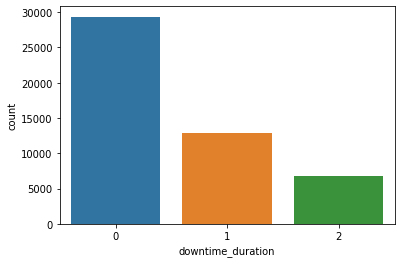

0    29347
1    12812
2     6814
Name: downtime_duration, dtype: int64
0    59.924857
1    26.161354
2    13.913789
Name: downtime_duration, dtype: float64


In [42]:
# Checking the Distribution of the Target Variable
sns.countplot(x='downtime_duration',data=df_train)
plt.show()
# What are the counts?
print(df_train.downtime_duration.value_counts())
# What is the percentage?
print(df_train.downtime_duration.value_counts(normalize=True)*100)
# This seems to be an imbalance dataset w.r.t classes "1" and "2"

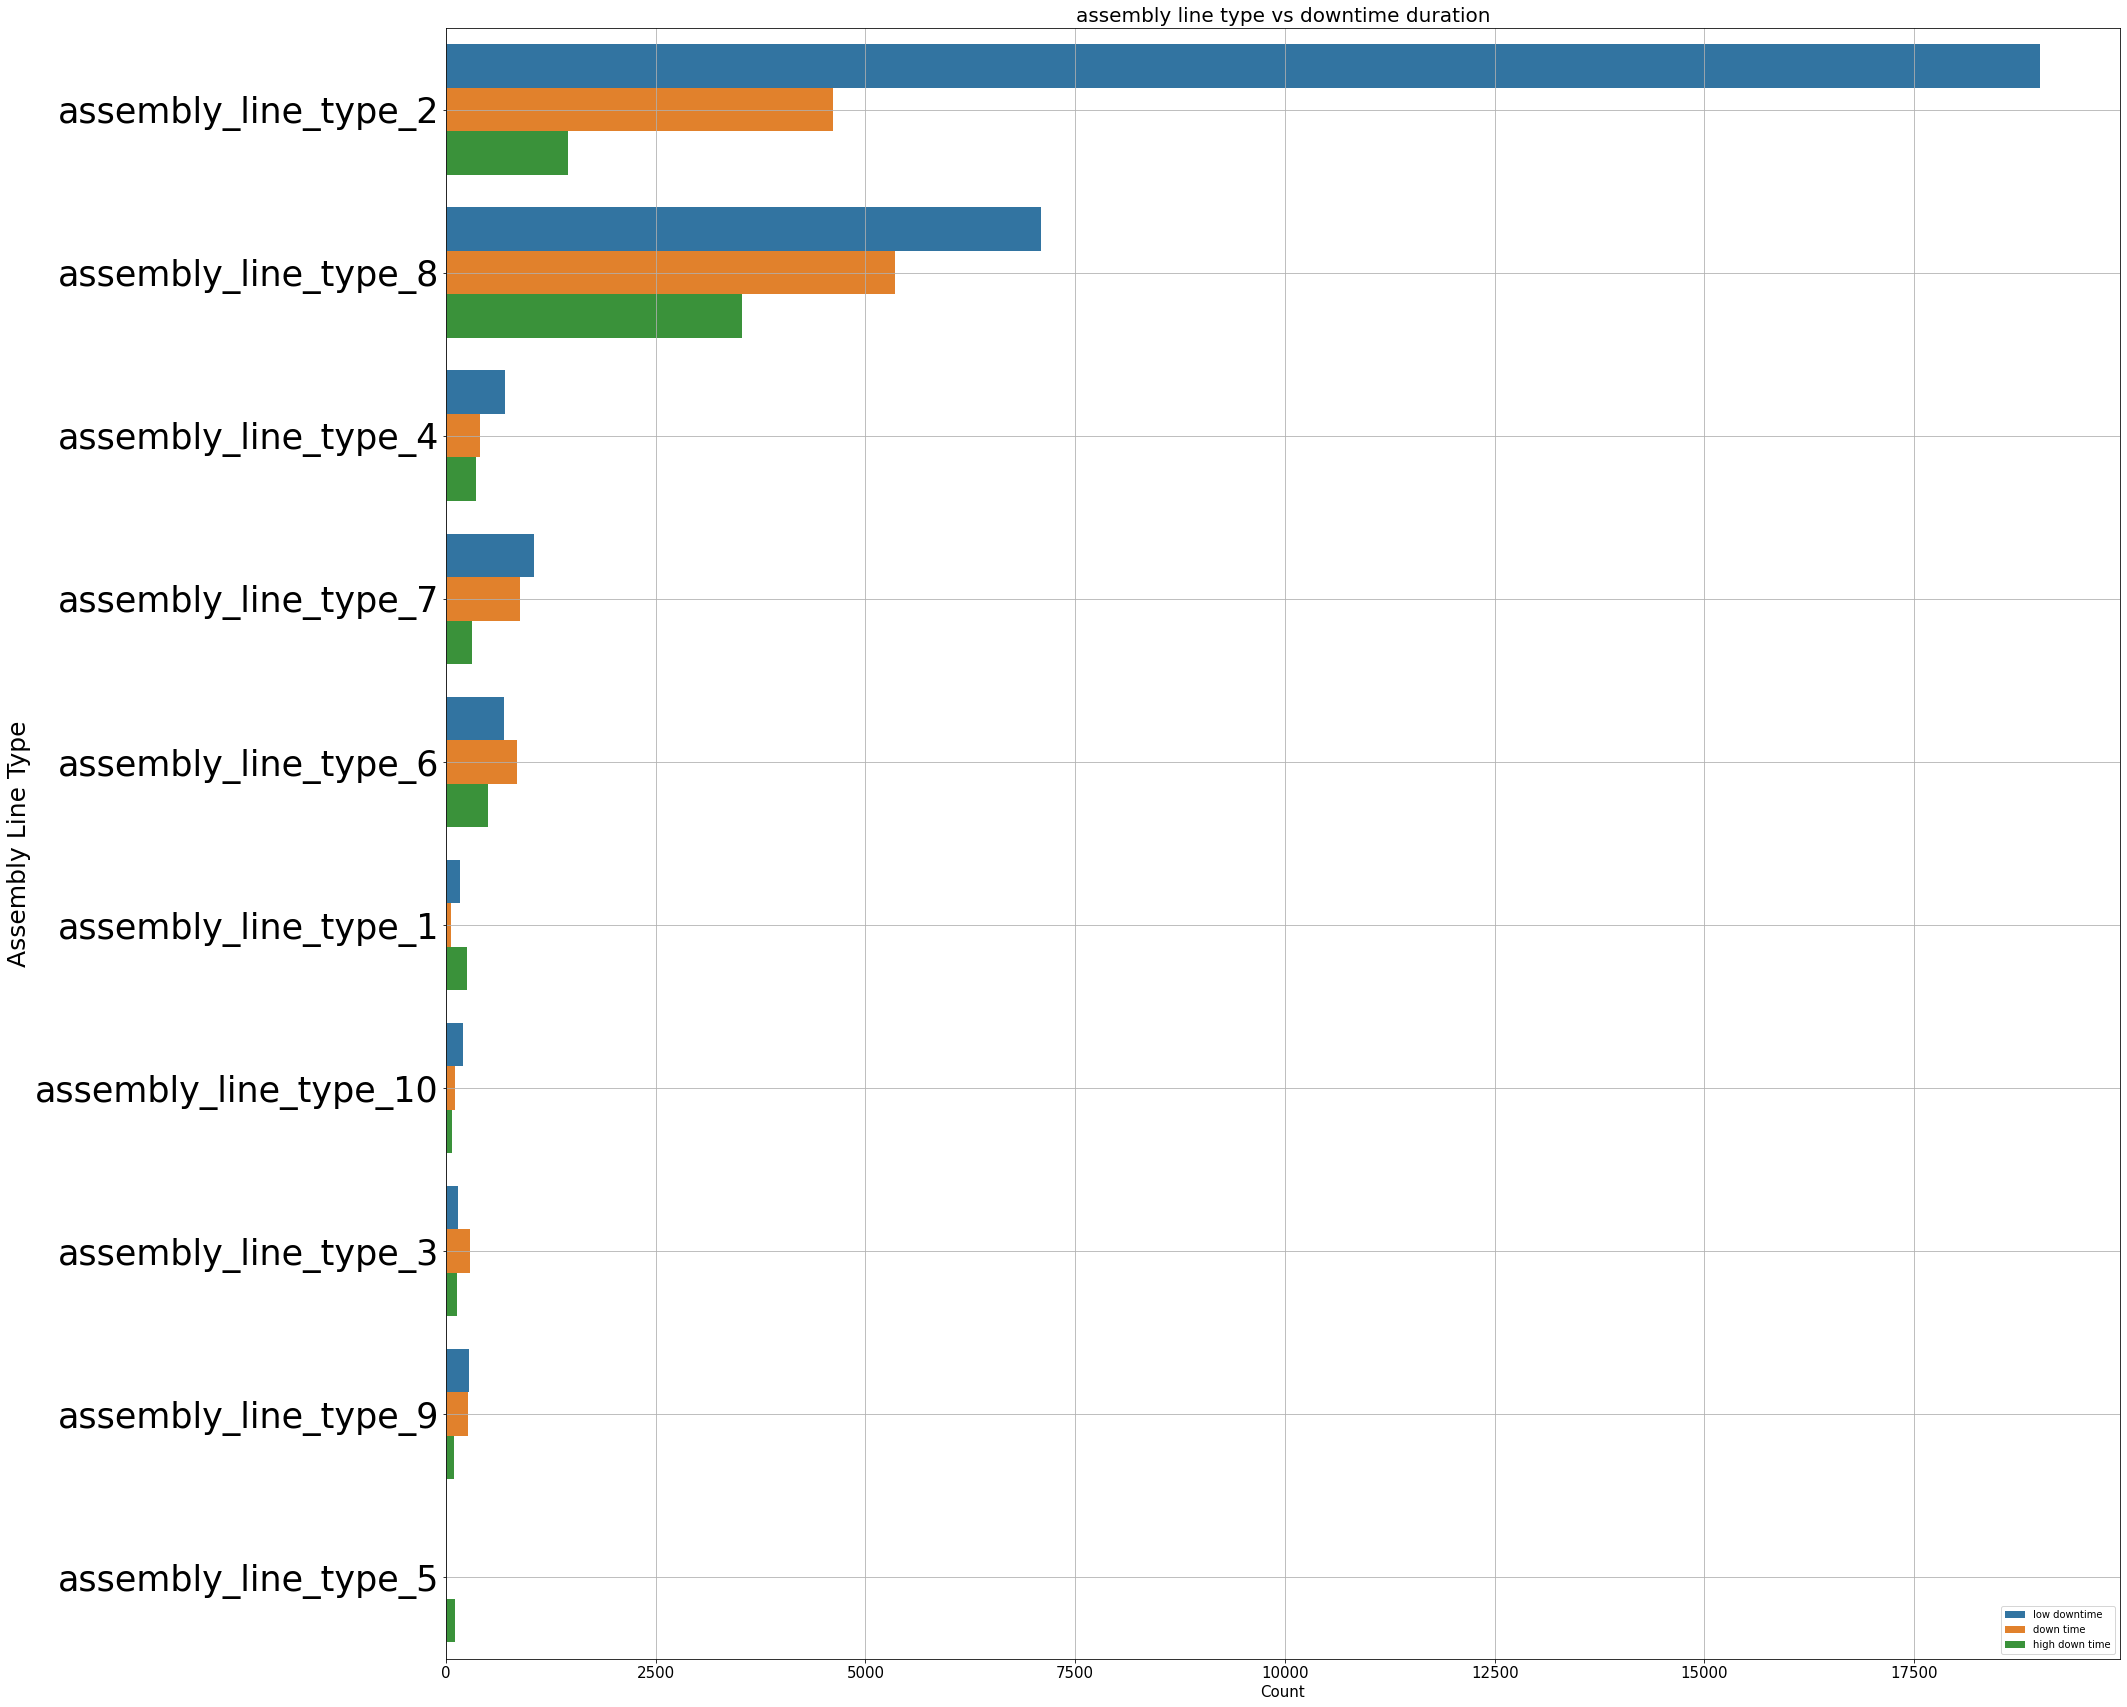

In [43]:
# How downtime_duration is related to assembly_line
plt.figure(figsize = (30,30))
sns.countplot(y='assembly_line_type',hue='downtime_duration',data=df_train) 
plt.legend(['low downtime','down time', 'high down time'])

plt.title("assembly line type vs downtime duration",fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Assembly Line Type',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=35)
plt.grid()
plt.show() 

In [104]:
%%html
<div class='tableauPlaceholder' id='viz1593918608971' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;AssemblyLine&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;AssemblyLine' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;AssemblyLine&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593918608971');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Observation

1) Assembly_line_2 and assembly_line_8 are most prone to downtime
2) Assembly_line_5 is least prone to downtime

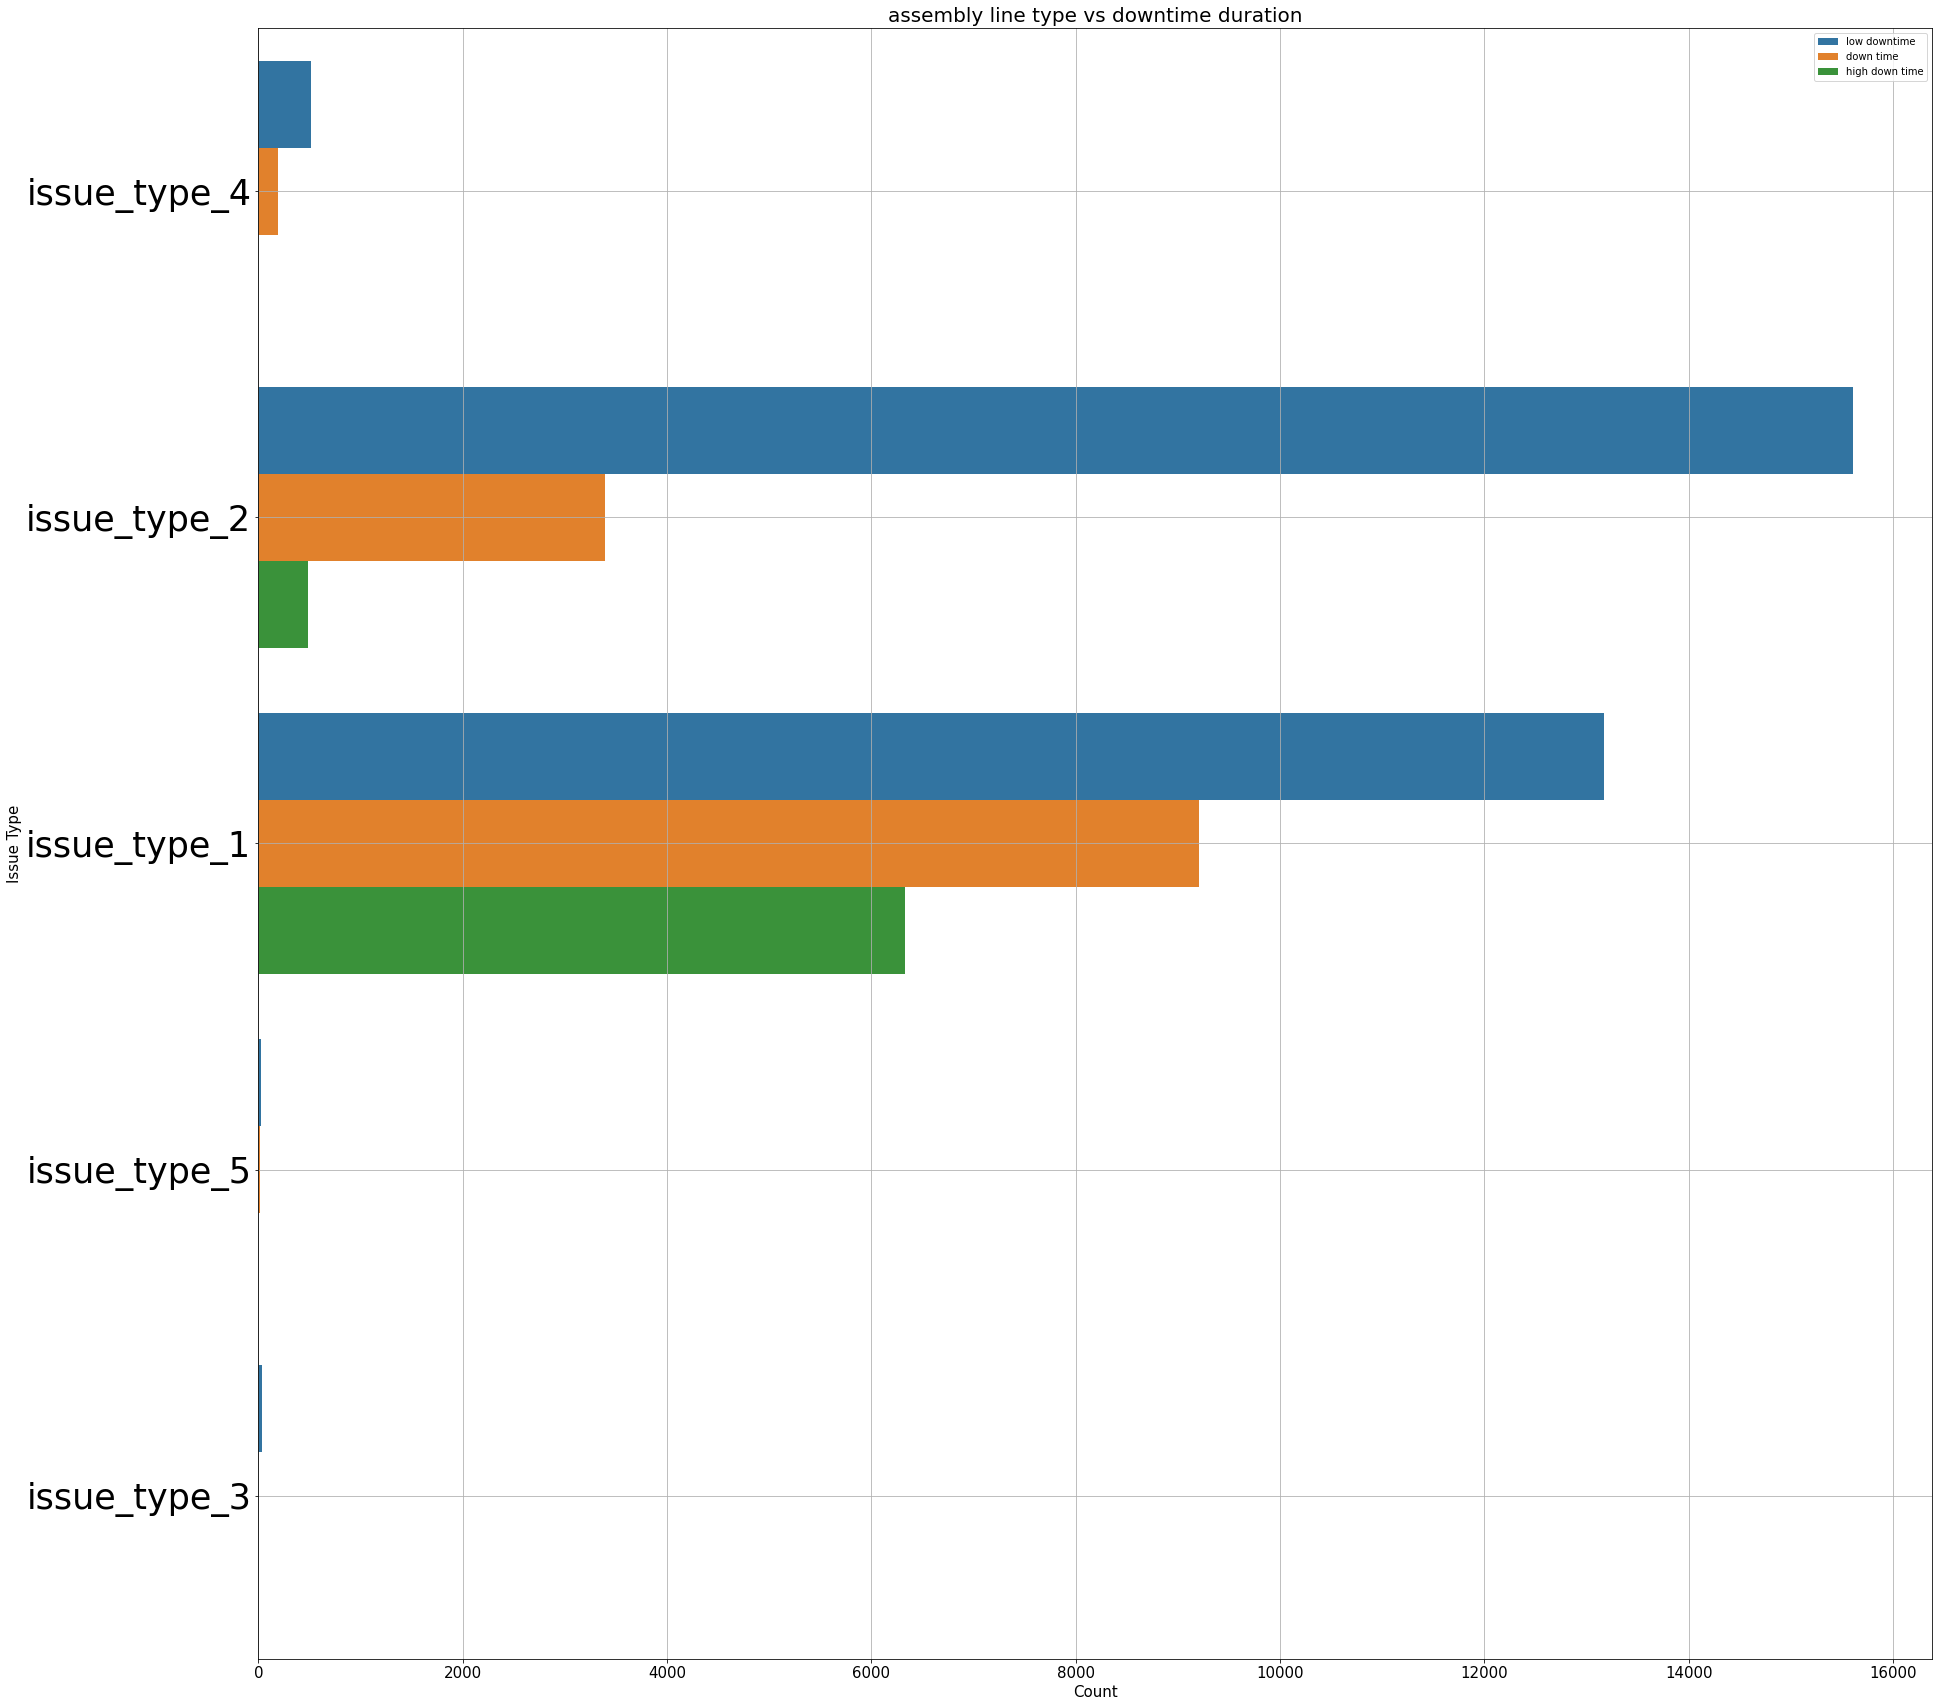

In [44]:
# How Downtime duration is related to issue_type
plt.figure(figsize = (30,30))
sns.countplot(y='issue_type',hue='downtime_duration',data=df_train) 
plt.legend(['low downtime','down time', 'high down time'])

plt.title("assembly line type vs downtime duration",fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Issue Type',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=35)
plt.grid()
plt.show() 

In [103]:
%%html
<div class='tableauPlaceholder' id='viz1593918095658' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;IssueType&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;IssueType' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;IssueType&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593918095658');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Observations

issue_type_2 and issue_type_1 more prone to to low downtimes. However issue_type_1 is more
prone to high down time issues as compared to others

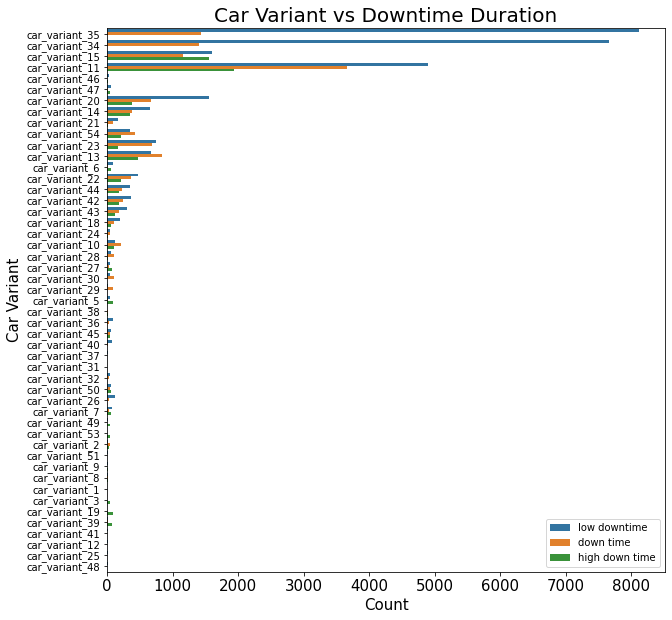

In [45]:
# How Car variant is related to Downtime duration
plt.figure(figsize = (10,10))
sns.countplot(y='car_variant',hue='downtime_duration',data=df_train) 
plt.legend(['low downtime','down time', 'high down time'],loc= "lower right")

plt.title("Car Variant vs Downtime Duration",fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Car Variant',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.show() 

In [105]:
%%html
<div class='tableauPlaceholder' id='viz1593918795970' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;CarVariant&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;CarVariant' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;CarVariant&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593918795970');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Observations

1) Car_Variant_35, Car_variant_34 and car_variant_11, car_variant_15 are more prone to downtimes in general
2) Car_variant_15, Car_variant_11 are more prone to Longer Downtimes
3) Car_variant_11 has the most downtime count

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

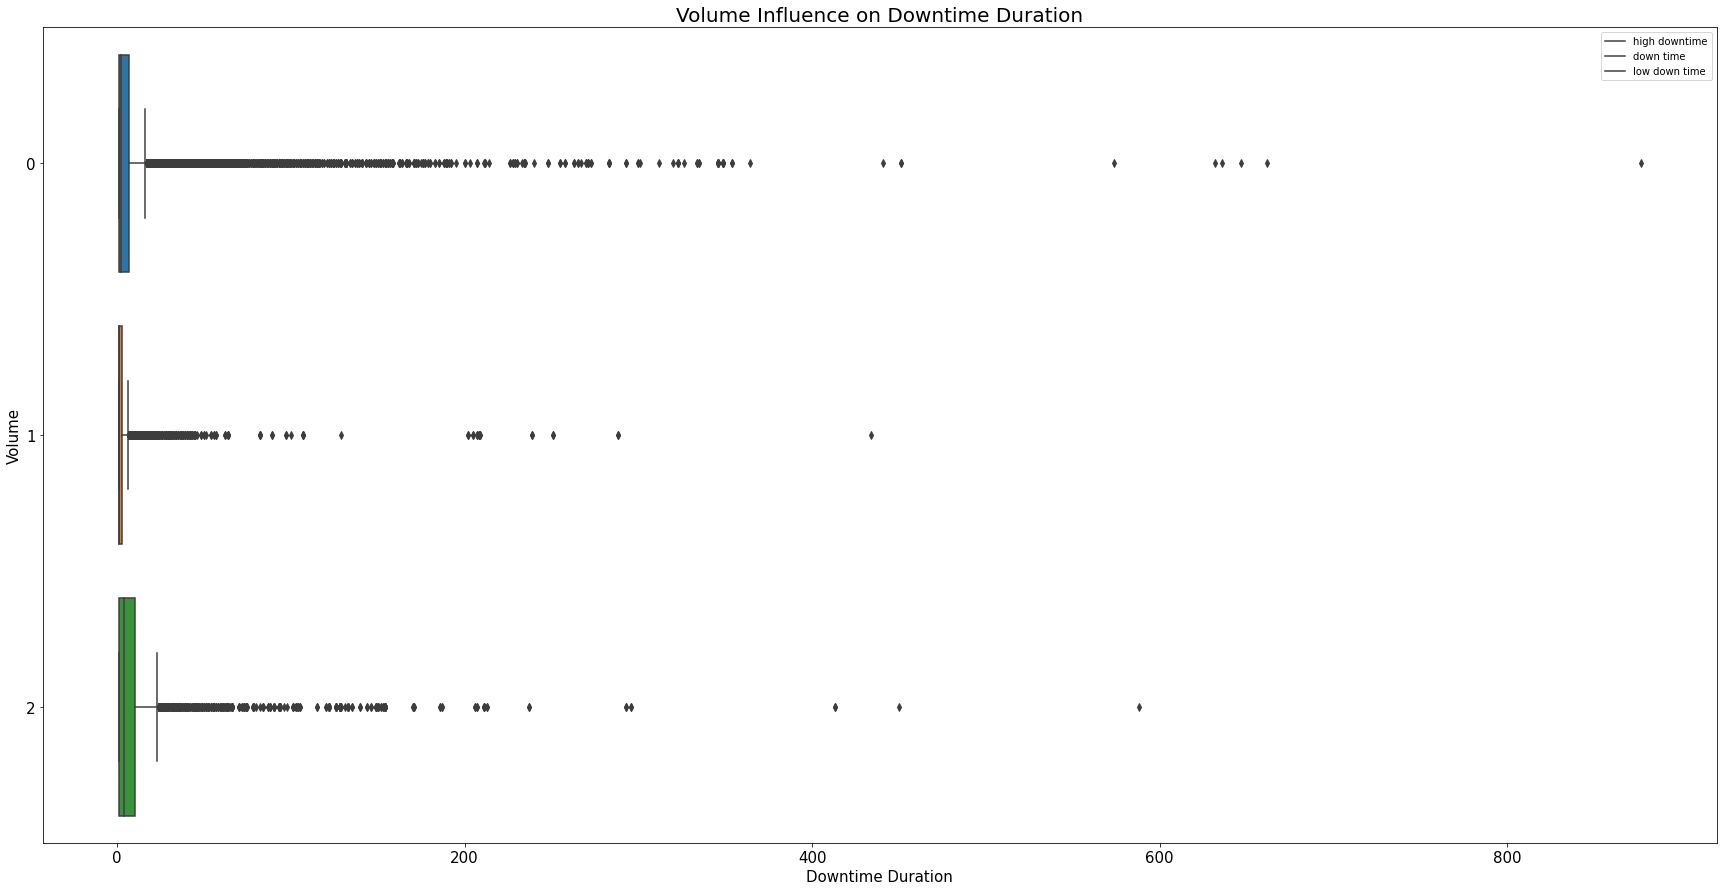

In [46]:
# Volume Vs Downtime
plt.figure(figsize = (30,15))
sns.boxplot(x='volume',y='downtime_duration',data=df_train) 
plt.title("Volume Influence on Downtime Duration",fontsize=20)
plt.xlabel('Downtime Duration',fontsize=15)
plt.legend(['high downtime','down time', 'low down time'],loc= "best")
plt.ylabel('Volume',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 

In [47]:
# Outlier Removal on Train data
import math
mu = df_train.volume.mean()
sigma = df_train.volume.std()
min_val = math.floor(mu - 3*sigma)
max_val = math.floor(mu + 3*sigma)
df_train.volume = df_train.volume.clip(min_val,max_val) 

In [48]:
# OutLier Removal on Test Data
import math
mu = df_test.volume.mean()
sigma = df_test.volume.std()
min_val = math.floor(mu - 3*sigma)
max_val = math.floor(mu + 3*sigma)
df_test.volume = df_test.volume.clip(min_val,max_val) 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

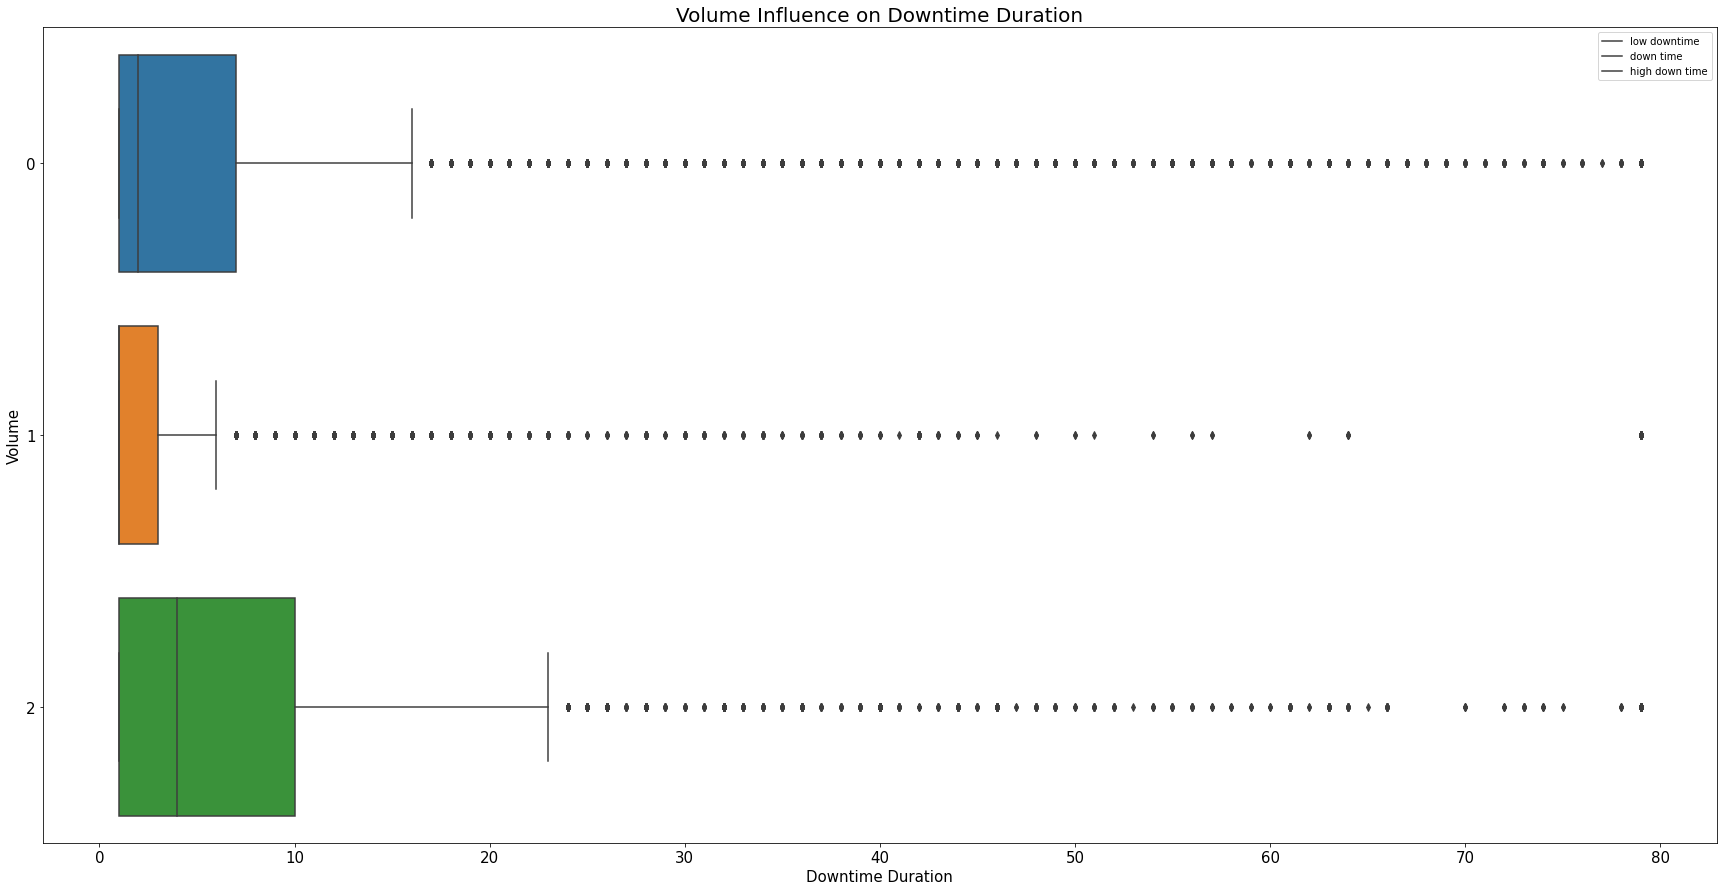

In [49]:
# Volume Vs Downtime After Outlier Removal
plt.figure(figsize = (30,15))
sns.boxplot(x='volume',y='downtime_duration',data=df_train) 
plt.title("Volume Influence on Downtime Duration",fontsize=20)
plt.xlabel('Downtime Duration',fontsize=15)
plt.legend(['low downtime','down time', 'high down time'],loc= "best")
plt.ylabel('Volume',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [102]:
%%html
<div class='tableauPlaceholder' id='viz1593915826494' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;FactoryNumber&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;FactoryNumber' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;FactoryNumber&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593915826494');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [107]:
%%html
<div class='tableauPlaceholder' id='viz1593921837249' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;FactoryNumber3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;FactoryNumber3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;FactoryNumber3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593921837249');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Observations

Looking at the Downtime Vs Factory_number following are the Observations
1) Factory_number_13 is prone to more longer downtime_duration
2) Factory_number_794 is prone to downtime in general

However if we look at the distribution, we have 18552 unique ids and 876 unique levels in factory_number with which we can set a threshold count of 20, to classify if a particular factory is prone to downtime, by looking at there average_downtime.

Based on this analysis Following are my observations
1) factory_13, factorynumber_535, factory_number_541, factory_number_632, factory_number_642 are prone to higher downtime duration.

In [51]:
df_train["volume_range"] = pd.cut(df_train.volume, bins=[0,1,5,10,50,100], 
                                  labels=["one", "upto_5","upto_10", "up_to_50","upto_100"])

In [52]:
df_train.head() 

,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume,volume_range
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,1,one
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_312,2,upto_5
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_233,1,one
3,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_232,1,one
4,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_315,2,upto_5


In [53]:
df_train.isna().sum() 

id                    0
factory_number        0
downtime_duration     0
assembly_line_type    0
car_variant           0
issue_type            0
log_report_type       0
volume                0
volume_range          0
dtype: int64

In [54]:
df_test["volume_range"] = pd.cut(df_train.volume, bins=[0,1,5,10,50,100], 
                                  labels=["one", "upto_5","upto_10", "up_to_50","upto_100"])

In [55]:
df_test.head() 

,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume,volume_range
0,3340,factory_number_344,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,2,one
1,14067,factory_number_933,assembly_line_type_2,car_variant_20,issue_type_1,log_report_type_134,1,upto_5
2,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_155,10,one
3,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_170,6,one
4,27,factory_number_793,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_73,3,upto_5


In [56]:
df_test.isna().sum() 

id                    0
factory_number        0
assembly_line_type    0
car_variant           0
issue_type            0
log_report_type       0
volume                0
volume_range          0
dtype: int64

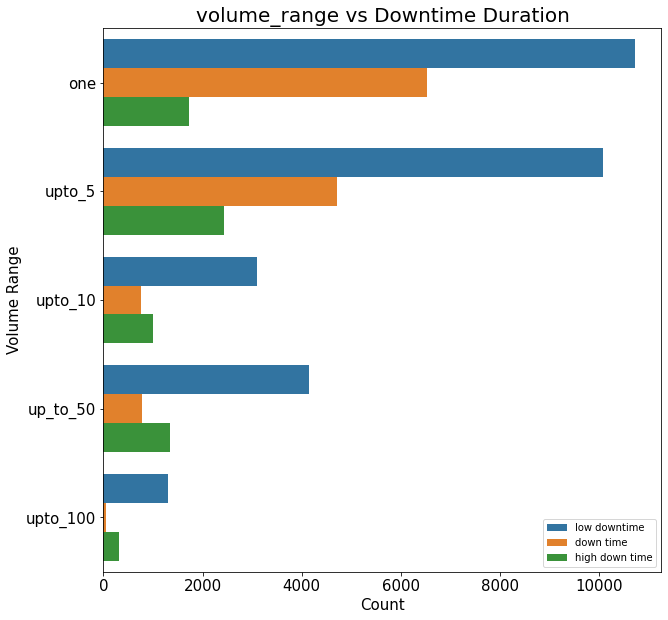

In [57]:
# Volume Rnge Vs Count
plt.figure(figsize = (10,10))
sns.countplot(y='volume_range',hue='downtime_duration',data=df_train) 
plt.legend(['low downtime','down time', 'high down time'],loc= "lower right")

plt.title("volume_range vs Downtime Duration",fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Volume Range',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

In [106]:
%%html
<div class='tableauPlaceholder' id='viz1593918967772' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;VolumeRange&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DowntimeDurationAnalysis&#47;VolumeRange' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Do&#47;DowntimeDurationAnalysis&#47;VolumeRange&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1593918967772');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# Observations

1) Volume of 1 and upto five electric vehicles are more suceptible to more downtime(2) and    more number of downtime issues in general
2) Volume range upto 5 is more prone to downtime issues
3) it could that if there are less volume, the complexity of the eV is more and hence, it's  more prone to downtime issues as compared to more volume on an assembly line, and those eVs may have a less complex design

In [58]:
#df_train.drop("volume",axis=1,inplace=True)
#df_test.drop("volume", axis=1, inplace=True)

In [59]:
df_train.head() 

,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume_range
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,one
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_312,upto_5
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_233,one
3,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_232,one
4,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_315,upto_5


In [60]:
df_test.head() 

,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume_range
0,3340,factory_number_344,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,one
1,14067,factory_number_933,assembly_line_type_2,car_variant_20,issue_type_1,log_report_type_134,upto_5
2,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_155,one
3,1134,factory_number_16,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_170,one
4,27,factory_number_793,assembly_line_type_8,car_variant_11,issue_type_1,log_report_type_73,upto_5


In [61]:
# Checking the column dtypes of train data
df_train.dtypes

id                       int64
factory_number          object
downtime_duration     category
assembly_line_type      object
car_variant             object
issue_type              object
log_report_type         object
volume_range          category
dtype: object

In [62]:
# Checking the column dtypes of test data
df_test.dtypes

id                       int64
factory_number          object
assembly_line_type      object
car_variant             object
issue_type              object
log_report_type         object
volume_range          category
dtype: object

In [63]:
cat_cols_train = ["factory_number","downtime_duration","assembly_line_type","car_variant",
                 "issue_type","log_report_type", "volume_range"]
cat_cols_test = ["factory_number","assembly_line_type","car_variant",
                 "issue_type","log_report_type", "volume_range"]

In [64]:
# Grouping the data based on Factory number
d= {}
factory_names = df_train.factory_number.unique().tolist() 
for name in factory_names:
    d[name] = pd.DataFrame(df_train.loc[df_train["factory_number"]==name])

In [65]:
d["factory_number_415"].shape

(33, 8)

In [66]:
for keys in d.keys():
    print(d[keys].shape)

(33, 8)
(108, 8)
(279, 8)
(8, 8)
(158, 8)
(33, 8)
(2, 8)
(812, 8)
(29, 8)
(5, 8)
(594, 8)
(20, 8)
(542, 8)
(77, 8)
(52, 8)
(82, 8)
(106, 8)
(84, 8)
(109, 8)
(73, 8)
(342, 8)
(22, 8)
(77, 8)
(84, 8)
(17, 8)
(57, 8)
(32, 8)
(106, 8)
(127, 8)
(16, 8)
(111, 8)
(141, 8)
(32, 8)
(306, 8)
(1285, 8)
(96, 8)
(7, 8)
(2, 8)
(44, 8)
(12, 8)
(139, 8)
(600, 8)
(54, 8)
(164, 8)
(12, 8)
(9, 8)
(932, 8)
(29, 8)
(164, 8)
(191, 8)
(102, 8)
(59, 8)
(3, 8)
(35, 8)
(510, 8)
(226, 8)
(350, 8)
(345, 8)
(179, 8)
(23, 8)
(28, 8)
(3, 8)
(8, 8)
(187, 8)
(104, 8)
(33, 8)
(100, 8)
(25, 8)
(72, 8)
(32, 8)
(48, 8)
(140, 8)
(12, 8)
(170, 8)
(312, 8)
(29, 8)
(293, 8)
(488, 8)
(28, 8)
(387, 8)
(12, 8)
(868, 8)
(4, 8)
(20, 8)
(126, 8)
(40, 8)
(135, 8)
(48, 8)
(4, 8)
(54, 8)
(26, 8)
(10, 8)
(49, 8)
(80, 8)
(363, 8)
(358, 8)
(12, 8)
(20, 8)
(11, 8)
(70, 8)
(46, 8)
(22, 8)
(8, 8)
(24, 8)
(84, 8)
(9, 8)
(117, 8)
(3, 8)
(47, 8)
(66, 8)
(594, 8)
(36, 8)
(21, 8)
(14, 8)
(19, 8)
(4, 8)
(206, 8)
(287, 8)
(3, 8)
(110, 8)
(14, 8)
(

In [67]:
df_train_x = df_train.drop('downtime_duration', axis=1)

In [68]:
df_train_merged = pd.concat([df_train_x, df_test],axis=0)

In [69]:
for i in range(0,len(df_train_merged.columns)):
    j=df_train_merged.columns[i]
    if(j in cat_cols_test):
        label_encoder = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
        label_encoder.fit(df_train_merged[j])
        df_train_merged[j]  = label_encoder.transform(df_train_merged[j])
        df_train_merged[j]  = df_train_merged[j].astype('category') 

In [70]:
df_train_merged.head() 

,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume_range
0,13366,407,2,25,3,205,0
1,6783,460,2,25,1,205,4
2,6783,460,2,25,1,134,0
3,6783,460,2,25,1,133,0
4,6783,460,2,25,1,208,4


In [71]:
df_train_merged.tail() 

,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume_range
12861,989,374,3,1,3,142,4
12862,989,374,3,1,3,50,4
12863,989,374,3,1,3,51,4
12864,3129,66,8,2,0,284,4
12865,3129,66,8,2,0,69,4


In [72]:
df_test_encoded=df_train_merged[df_train_merged.id.isin(df_test.id.tolist())]

In [73]:
df_train_encoded= df_train_merged[~df_train_merged.id.isin(df_test.id.tolist())] 

In [74]:
def classifcation_report_train_test(y_train, y_train_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

In [75]:
df_train_clean = df_train_encoded.drop("id",axis=1)
df_test_clean = df_test_encoded.drop("id", axis =1)

In [76]:
y_train = df_train.downtime_duration

In [77]:
# Building Decison Tree Classifier with CV
paramgrid = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1)),
             "min_samples_split": [1,2,5,10]}
dt_gridsearch = GridSearchCV(DecisionTreeClassifier(class_weight="balanced", random_state=1234),
                             param_grid=paramgrid,n_jobs=-1,cv=10)
dt_gridsearch.fit(df_train_clean,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1234,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'c

In [78]:
y_train_predict = dt_gridsearch.best_estimator_.predict(df_train_clean)
y_test_predict = dt_gridsearch.best_estimator_.predict(df_test_clean)

In [79]:
df_test_dt_cv = df_test.copy()

In [80]:
df_test_dt_cv["downtime_duration"] = y_test_predict

In [81]:
df_test_dt_cv.drop(cat_cols_test,axis=1,inplace=True) 

In [82]:
df_test_dt_cv.drop_duplicates(subset="id",keep="first", inplace=True)

In [83]:
df_test_dt_cv.shape

(1477, 2)

In [84]:
classifcation_report_train_test(y_train, y_train_predict)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.87      0.48      0.62     29347
           1       0.38      0.48      0.42     12812
           2       0.28      0.68      0.40      6814

    accuracy                           0.51     48973
   macro avg       0.51      0.55      0.48     48973
weighted avg       0.66      0.51      0.54     48973



In [85]:
# Building a Basic Random forest Model
rf_clf = RandomForestClassifier(class_weight="balanced",n_estimators=50, max_depth=7,
                                random_state=1234)
rf_clf.fit(df_train_clean,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [86]:
y_train_predict_rf = rf_clf.predict(df_train_clean)
y_test_predict_rf = rf_clf.predict(df_test_clean) 

In [87]:
df_test_rf= df_test.copy() 

In [88]:
df_test_rf["downtime_duration"] = y_test_predict_rf

In [89]:
df_test_rf.drop(cat_cols_test,axis=1,inplace=True)

In [90]:
df_test_rf.drop_duplicates(subset="id",keep='first',inplace=True)

In [91]:
df_test_rf.shape

(1477, 2)

In [92]:
classifcation_report_train_test(y_train, y_train_predict_rf) 


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       0.92      0.53      0.67     29347
           1       0.48      0.56      0.52     12812
           2       0.35      0.90      0.50      6814

    accuracy                           0.59     48973
   macro avg       0.59      0.66      0.56     48973
weighted avg       0.73      0.59      0.61     48973



# I have Perform advance analysis using another approach in other file